# Phase-matching - Optimal GeO2 doped optical fiber tapers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import savemat
from matplotlib.ticker import MaxNLocator

from topdc_calc import topdc_calc

In [2]:
dispdata=np.load('disp_data.npy',allow_pickle=True).item()
omf=dispdata['omf']
triplet_neff=dispdata['triplet_neff']
omp=dispdata['omp']
pump_neff=dispdata['pump_neff']
wp_cutoff=9.8  #Pump mode cutoff frequency in 10^14 rad/s

test=topdc_calc(omf,triplet_neff,omp,pump_neff,wp_cutoff)

In [3]:
# Declaration of variables

c0=3 # Velocity of light in vacuum in um/(1e-14 s)
L=300000 # Waveguide length in um ->10000 um=1 cm

wf0=test.w_pm(13)   # Triplet phase-matching frequency in 10^14 rad/s (The input parameter 13  is the initial guess for the triplet central frequency--> You can check this by plotting the dispersion of the pump and triplet modes) 
wp0=3*wf0   # Pump phase-matching frequency in 10^14 rad/s 

# Spectral resolution
sigmap=test.pm_bw(L,13) #Half-width (at 1/e-pump intensity point) matching approximately the width of the phase-matching function, measured in terms of the sinc's main lobe width
delw=sigmap/60 # The spectral resolution is defined such that a minimum of 60 discrete points are sampled within each frequency vector over the bandwidth of the phase-matching function, regardless of the specific width of the evaluation function.

#Spectral window
domg=8*sigmap # We set the half-width of the frequency window wide enough to sample correctly both the jsa and reduced density matrix
omf1=np.arange(wf0-domg,wf0+domg,delw) # Frequency evaluation vector centered at the photon triplet phase-matching frequency with units 10^14 rad/s


/tmp/ipykernel_510077/1874201609.py:29: UserWarning: The figure layout has changed to tight
  figd2.tight_layout()


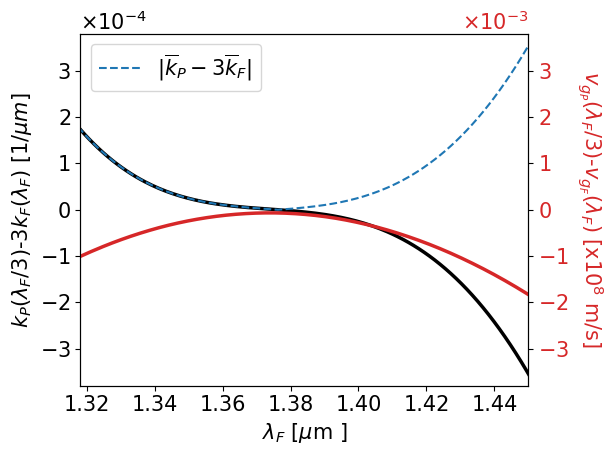

In [4]:
font={'size':15}
plt.rc('font',**font)
figd2, axsd2 = plt.subplots(1, 1, sharex=True, sharey=True, constrained_layout=True)


plt.plot((2*np.pi*c0/omf1),(test.delk0(omf1)),linewidth=2.5,color='k')
plt.plot((2*np.pi*c0/omf1),(abs(test.delk0(omf1))),'--',label=r'$|\overline{k}_P-3\overline{k}_F|$')


plt.xlabel(r'$\lambda_F$ [$\mu$m ]')
plt.xlim(2*np.pi*c0/14.3,2*np.pi*c0/13)
# plt.axhline(0,color='black')
plt.ylabel(r'$k_{P}(\lambda_F/3)$-$3k_{F}( \lambda_F)$ [1/$\mu m$]')
plt.legend()
axsd2.set_ylim(-3.8*1e-4,3.8*1e-4)

axsd2.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

axsd3=axsd2.twinx()
color = 'tab:red'

axsd3.set_ylabel(r'$v_{g_P}(\lambda_F/3)$-$v_{g_F}( \lambda_F)$ [x$10^8$ m/s]',color=color, rotation=270,va='bottom')
axsd3.plot((2*np.pi*c0/omf1),test.gvm(omf1),color=color,linewidth=2.5)
axsd3.tick_params(axis='y',labelcolor=color)
axsd3.set_ylim(-3.8e-3,3.8e-3)

axsd3.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)

figd2.tight_layout()

# plt.savefig("Figures_export/PM_GVM_rco_849nm_rcl_2341nm_wl.pdf", format="pdf", bbox_inches="tight")
plt.show()